In [75]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

np.random.seed(42)

## Exploratory Data Analysis & Data Cleaning

### Step # 1 : Data Cleaning

The following dataset will be used to explore the Ames, Iowa housing observations:

- **train.csv** -- this data contains all of the training data for modeling the Aimes, Iowa housing dataset. This will be loaded and used first.

In [2]:
ames_df = pd.read_csv('../data/train.csv', index_col='Id')

In [3]:
ames_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
ames_df.drop('PID', 1, inplace=True)

In [5]:
ames_df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
ames_df.shape

(2051, 79)

In [7]:
ames_df.columns = [x.lower().replace(' ', '_') for x in ames_df.columns]

In [8]:
ames_df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
109,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


#### The Data Vacuum Clean

- In the next numerous amounts of cells I will be dropping specific columns
- Reviewing columns for NaN values
- Updating columns data types to the correct types based on if the data is categorical or numeric (continuous)
- Review numeric columns for empty cells and fill these cells with the average value from the dataset
- Dropping found outliers

<details><summary>For an in depth review of the data clean click here:</summary>
```
Droping the following columns:

- Alley : done
- Pool QC : done
- Fence : done
- Misc Feature : done
- misc_val : done
- garage_yr_built : done
- fireplace_qu: done
- pool_area: done (only 8 records with data that is not 0)
- 3ssn_porch : done
- low_qual_fin_sf : done
- garage_finish : done
- garage_cond : done
- bsmt_cond : done
- exter_cond : done

The following need to be reviewed for NaN to determine what needs to be inserted:

- year_built      : change to object
- year_remod/add  : change to object
- ms_subclass     : change to object
- overall_qual    : change to object
- overall_cond    : change to object
- full_bath       : change to object
- half_bath       : change to object
- bedroom_abvgr   : change to object
- kitchen_abvgr   : change to object
- kitchen_abvgr   : change to object
- totrms_abvgrd   : change to object
- fireplaces      : change to object
- mo_sold         : change to object
- yr_sold         : change to object
- Lot Frontage    : mean of the column for all NaN
- Mas Vnr Type    : dropping NaN rows 1051-1029
- Mas Vnr Area    : dropping NaN rows 1051-1029
- Bsmt Qual       : fill with NA No Basement       
- Bsmt Cond       : fill with NA No Basement        
- Bsmt Exposure   : fill with NA No Basement     
- BsmtFin Type 1  : fill with NA No Basement
- BsmtFin SF 1    : fill with 0
- BsmtFin Type 2  : fill with NA No Basement
- BsmtFin SF 2    : fill with 0
- Bsmt Unf SF     : fill with 0
- Total Bsmt SF   : fill with 0
- Bsmt Full Bath  : fill with 0 and update type to object
- Bsmt Half Bath  : fill with 0 and update type to object
- Fireplace Qual  : dropping the column
- Garage Type     : fill with NA No Garage
- Garage Finish   : fill with NA No Garage
- Garage Cars     : fill with 0 and update type to object
- Garage Area     : fill with 0
- Garage Qual     : fill with NA No Garage
- Garage Cond     : fill with NA No Garage
- misc_val        : drop column

Next, review scatter plot and determine outliers and drop these records
- Removing two max outliers related to Lot Area.
- Removing two salesprices that are outliers at the lower end (below 20,000)
```
</details>

In [9]:
ames_df.drop('alley', axis=1, inplace=True)

In [10]:
ames_df.drop(['pool_qc', 'fence', 'misc_feature'], axis=1, inplace=True)

In [11]:
ames_df.shape

(2051, 75)

In [12]:
ames_df.lot_frontage.mean()

69.05520046484602

In [13]:
ames_df['lot_frontage'].fillna(ames_df['lot_frontage'].mean(), inplace=True)

In [14]:
ames_df.dropna(subset=['mas_vnr_type'], inplace=True)

In [15]:
ames_df.bsmt_qual.value_counts()

TA    886
Gd    850
Ex    177
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [16]:
ames_df['bsmt_qual'].fillna('NA', inplace=True)

In [17]:
ames_df.bsmt_qual.value_counts()

TA    886
Gd    850
Ex    177
Fa     60
NA     55
Po      1
Name: bsmt_qual, dtype: int64

In [18]:
ames_df.bsmt_cond.value_counts()

TA    1814
Gd      87
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [19]:
ames_df['bsmt_cond'].fillna('NA', inplace=True)

In [20]:
ames_df['bsmtfin_type_2'].fillna('NA', inplace=True)

In [21]:
ames_df['bsmtfin_type_2'].value_counts()

Unf    1728
Rec      80
LwQ      60
NA       56
BLQ      48
ALQ      34
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [22]:
ames_df['bsmt_exposure'].fillna('NA', inplace=True)

In [23]:
ames_df['bsmt_exposure'].value_counts()

No    1322
Av     284
Gd     202
Mn     163
NA      58
Name: bsmt_exposure, dtype: int64

In [24]:
ames_df['bsmtfin_type_1'].fillna('NA', inplace=True)

In [25]:
ames_df['bsmtfin_type_1'].value_counts()

GLQ    604
Unf    593
ALQ    293
BLQ    200
Rec    182
LwQ    102
NA      55
Name: bsmtfin_type_1, dtype: int64

In [26]:
ames_df['bsmtfin_sf_1'].fillna(0, inplace=True)

In [27]:
ames_df[ames_df.bsmtfin_sf_2.isnull()]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
1342,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,...,0,0,0,0,0,0,4,2008,ConLD,79000


In [28]:
ames_df['bsmtfin_sf_2'].fillna(0, inplace=True)

In [29]:
ames_df[ames_df.bsmt_unf_sf.isnull()]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
1342,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,...,0,0,0,0,0,0,4,2008,ConLD,79000


In [30]:
ames_df['bsmt_unf_sf'].fillna(0, inplace=True)

In [31]:
ames_df['total_bsmt_sf'].fillna(0, inplace=True)

In [32]:
ames_df['bsmt_full_bath'].fillna(0, inplace=True)

In [33]:
ames_df['bsmt_full_bath'].value_counts()

0.0    1190
1.0     814
2.0      23
3.0       2
Name: bsmt_full_bath, dtype: int64

In [34]:
ames_df['bsmt_half_bath'].fillna(0, inplace=True)

In [35]:
ames_df['bsmt_half_bath'].value_counts()

0.0    1903
1.0     122
2.0       4
Name: bsmt_half_bath, dtype: int64

In [36]:
ames_df.drop('fireplace_qu', axis=1, inplace =True)

In [37]:
ames_df.garage_type.value_counts()

Attchd     1195
Detchd      536
BuiltIn     129
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [38]:
ames_df['garage_type'].fillna('NA', inplace=True)

In [39]:
ames_df.garage_finish.value_counts()

Unf    847
RFn    572
Fin    497
Name: garage_finish, dtype: int64

In [40]:
ames_df['garage_finish'].fillna('NA', inplace=True)

In [41]:
ames_df.garage_cars.value_counts()

2.0    1119
1.0     524
3.0     259
0.0     112
4.0      13
5.0       1
Name: garage_cars, dtype: int64

In [42]:
ames_df.drop('garage_yr_blt', axis=1, inplace=True)

In [43]:
ames_df['garage_cars'].fillna(0, inplace=True)

In [44]:
ames_df['garage_area'].fillna(0, inplace=True)

In [45]:
ames_df['garage_qual'].fillna('NA', inplace=True)

In [46]:
ames_df.garage_qual.value_counts()

TA    1811
NA     113
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [47]:
ames_df['garage_cond'].fillna('NA', inplace=True)

In [48]:
ames_df.garage_cond.value_counts()

TA    1847
NA     113
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64

In [49]:
ames_df.land_slope.value_counts()

Gtl    1931
Mod      88
Sev      10
Name: land_slope, dtype: int64

In [50]:
ames_df.drop('misc_val', axis=1, inplace=True)

In [51]:
ames_df[[
    'year_built', 
    'year_remod/add',
    'bsmt_full_bath',
    'bsmt_half_bath',
    'full_bath',
    'half_bath',
    'bedroom_abvgr',
    'kitchen_abvgr',
    'totrms_abvgrd',
    'fireplaces',
    'mo_sold',
    'yr_sold',   
    'garage_cars',
    'ms_subclass',
    'overall_qual',
    'overall_cond']] = ames_df[[
    'year_built', 
    'year_remod/add',
    'bsmt_full_bath',
    'bsmt_half_bath',
    'full_bath',
    'half_bath',
    'bedroom_abvgr',
    'kitchen_abvgr',
    'totrms_abvgrd',
    'fireplaces',
    'mo_sold',
    'yr_sold',   
    'garage_cars',
    'ms_subclass',
    'overall_qual',
    'overall_cond']].astype(object)

In [52]:
ames_df.sort_values('lot_area', ascending=False).head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,mo_sold,yr_sold,sale_type,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
2116,50,RL,69.0552,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,...,0,98,0,0,0,0,6,2007,WD,277000
2072,20,RL,69.0552,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,...,380,48,0,0,0,0,6,2007,WD,302000
2767,20,RL,62.0000,70761,Pave,IR1,Low,AllPub,Inside,Mod,...,200,54,0,0,0,0,12,2006,WD,280000
1499,60,RL,313.0000,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,214,292,0,0,0,480,1,2008,New,160000
315,20,RL,69.0552,57200,Pave,IR1,Bnk,AllPub,Inside,Sev,...,0,0,50,0,0,0,6,2010,WD,160000


In [53]:
ames_df.drop(index=2116, axis=1, inplace=True)

In [54]:
ames_df.drop(index=2072, axis=1, inplace=True)

In [55]:
ames_df.drop('pool_area', axis=1, inplace=True)

In [56]:
ames_df.sort_values('saleprice').head(10)

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,mo_sold,yr_sold,sale_type,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
182,30,RM,68.0,9656,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,N,0,0,0,0,0,6,2010,WD,12789
1554,20,A (agr),80.0,14584,Pave,Reg,Low,AllPub,Inside,Mod,...,N,0,0,0,0,0,2,2008,WD,13100
727,30,C (all),60.0,7879,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,N,0,523,115,0,0,11,2009,WD,34900
2844,30,RL,60.0,8088,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,N,0,0,100,0,0,2,2006,ConLD,35000
2881,20,C (all),50.0,9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,0,0,0,0,10,2006,WD,35311
710,50,RM,50.0,5925,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,0,0,0,0,5,2009,WD,37900
1902,20,RL,50.0,5000,Pave,Reg,Low,AllPub,Inside,Mod,...,N,0,0,0,0,0,1,2007,WD,39300
1556,70,C (all),50.0,8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,N,0,54,172,0,0,7,2008,WD,40000
728,30,C (all),72.0,9392,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,N,0,36,94,0,0,9,2009,WD,44000


In [57]:
ames_df.drop(index=182, axis=1, inplace=True)

In [58]:
ames_df.drop(index=1554, axis=1, inplace=True)

In [59]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2025 entries, 109 to 10
Data columns (total 71 columns):
ms_subclass        2025 non-null object
ms_zoning          2025 non-null object
lot_frontage       2025 non-null float64
lot_area           2025 non-null int64
street             2025 non-null object
lot_shape          2025 non-null object
land_contour       2025 non-null object
utilities          2025 non-null object
lot_config         2025 non-null object
land_slope         2025 non-null object
neighborhood       2025 non-null object
condition_1        2025 non-null object
condition_2        2025 non-null object
bldg_type          2025 non-null object
house_style        2025 non-null object
overall_qual       2025 non-null object
overall_cond       2025 non-null object
year_built         2025 non-null object
year_remod/add     2025 non-null object
roof_style         2025 non-null object
roof_matl          2025 non-null object
exterior_1st       2025 non-null object
exterior_2nd 

In [60]:
ames_df.drop('3ssn_porch', axis=1, inplace=True)

In [61]:
ames_df.drop('low_qual_fin_sf', axis=1, inplace=True)

In [62]:
ames_df.drop('garage_finish', axis=1, inplace=True)

In [63]:
ames_df.drop('garage_cond', axis=1, inplace=True)

In [64]:
ames_df.drop('bsmt_cond', axis=1, inplace=True)

In [65]:
ames_df.drop('exter_cond', axis=1, inplace=True)

#### Data Vacuum Clean Complete

The data clean is completed and the below data frame will be saved to a CSV for later use.

In [66]:
ames_df.to_csv('../data/ames_iowa_data_clean')

### Step 2: Exploratory Data Analysis

Through the above data cleaning I wanted to investigate a few different things that I saw in the data:

1. A barplot of Neighborhood vs Lot Area
2. A barplot of Neighborhood vs Sale Price
3. A scatter plot of Lot Area vs Sale Price
4. A distribution of the Sale Prices for this Aimes, Iowa dataset
5. A visual scatter plot of all the numeric (continuous) features compared to our target variable (Sale Price)

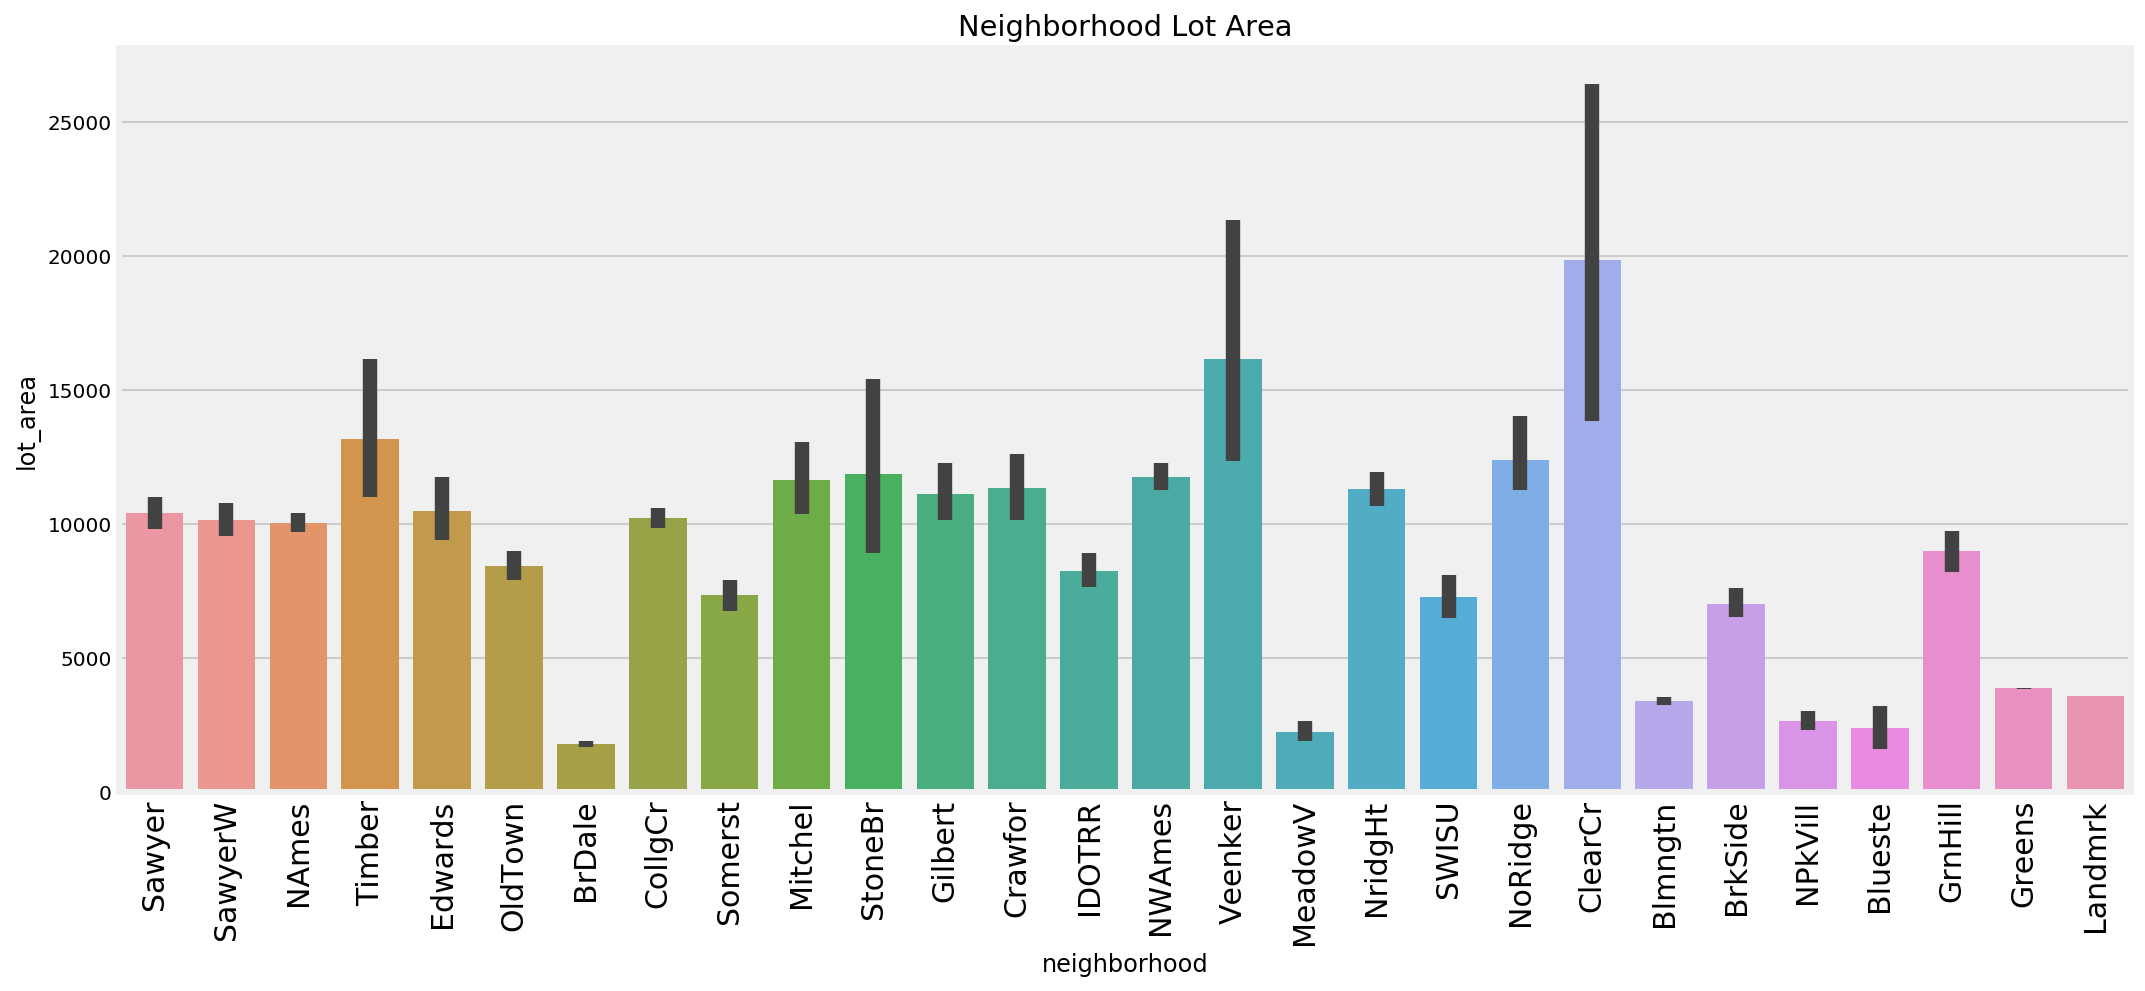

In [67]:
plt.figure(figsize=(15,7))
plt.title('Neighborhood Lot Area')
locs, labels = plt.xticks(fontsize=15)
plt.setp(labels, rotation=90)
sns.barplot(x="neighborhood", y="lot_area", data=ames_df, alpha=1)
plt.tight_layout();

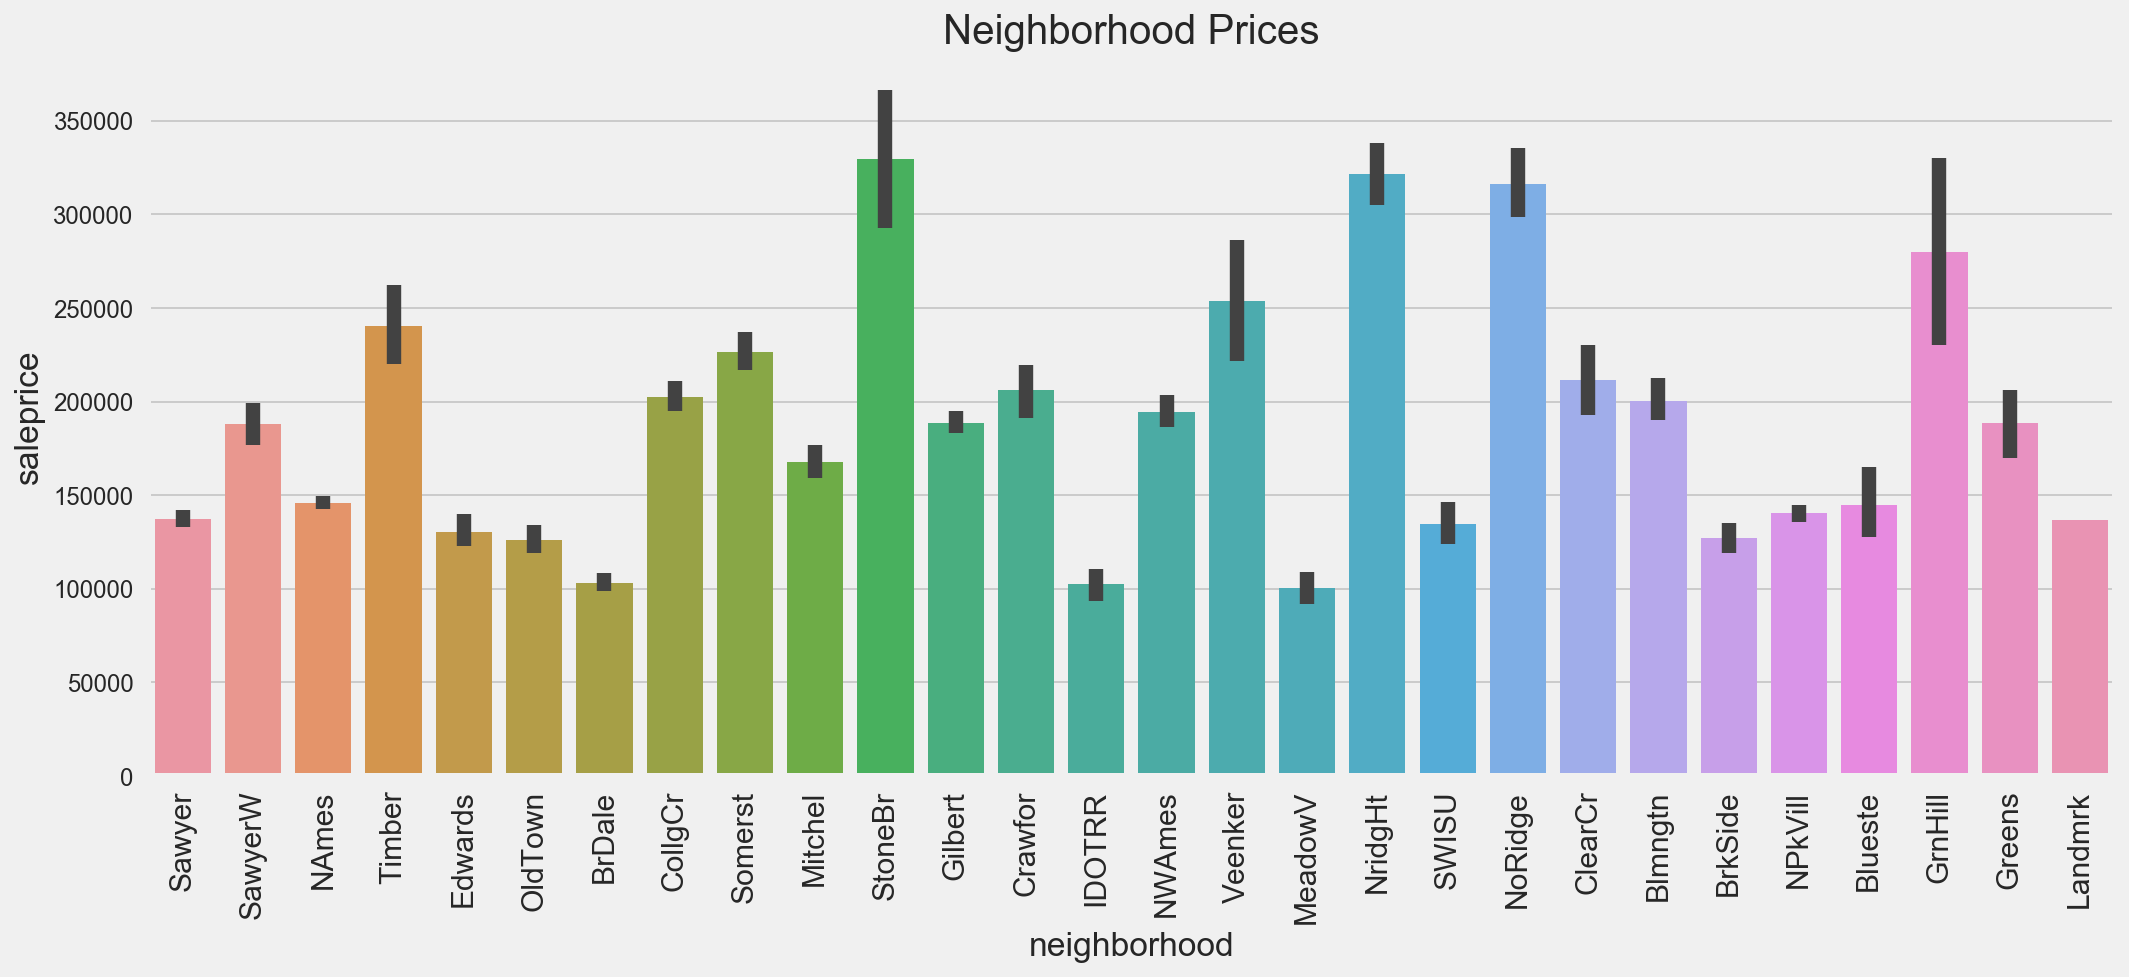

In [76]:
plt.figure(figsize=(15,7))
plt.title('Neighborhood Prices')
locs, labels = plt.xticks(fontsize=15)
plt.setp(labels, rotation=90)
sns.barplot(x="neighborhood", y="saleprice", data=ames_df, alpha=1)
plt.tight_layout();

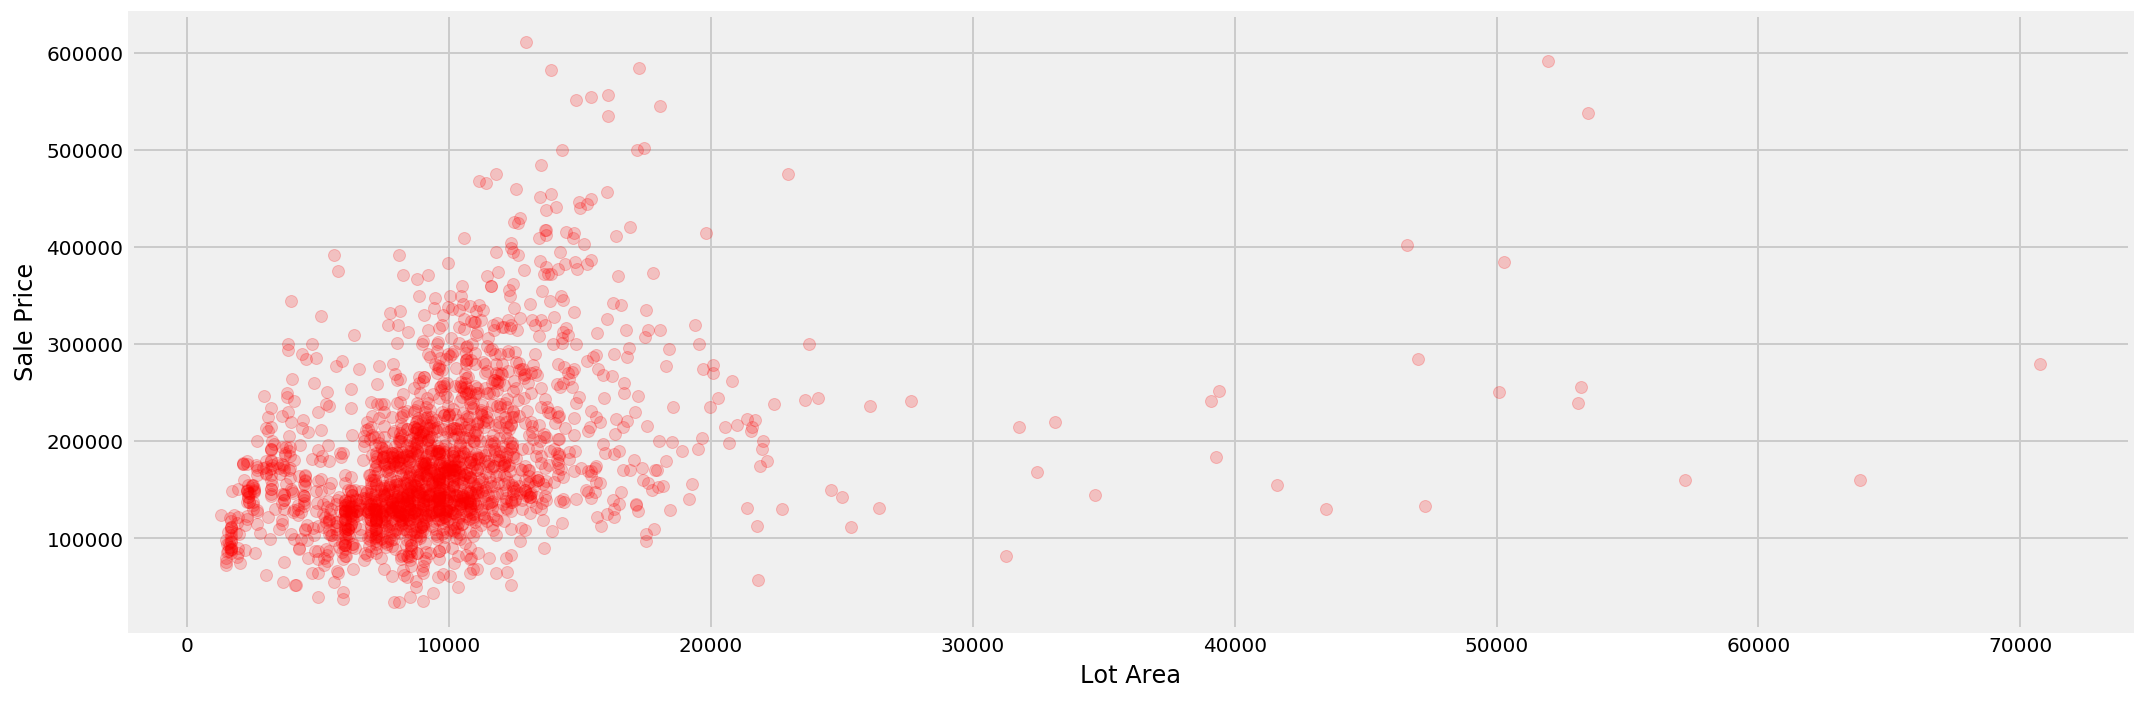

In [69]:
plt.figure(figsize=(15,5))
ax = plt.gca()
plt.scatter(x = ames_df['lot_area'], y=ames_df['saleprice'], color='r', alpha=0.2)
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.tight_layout();

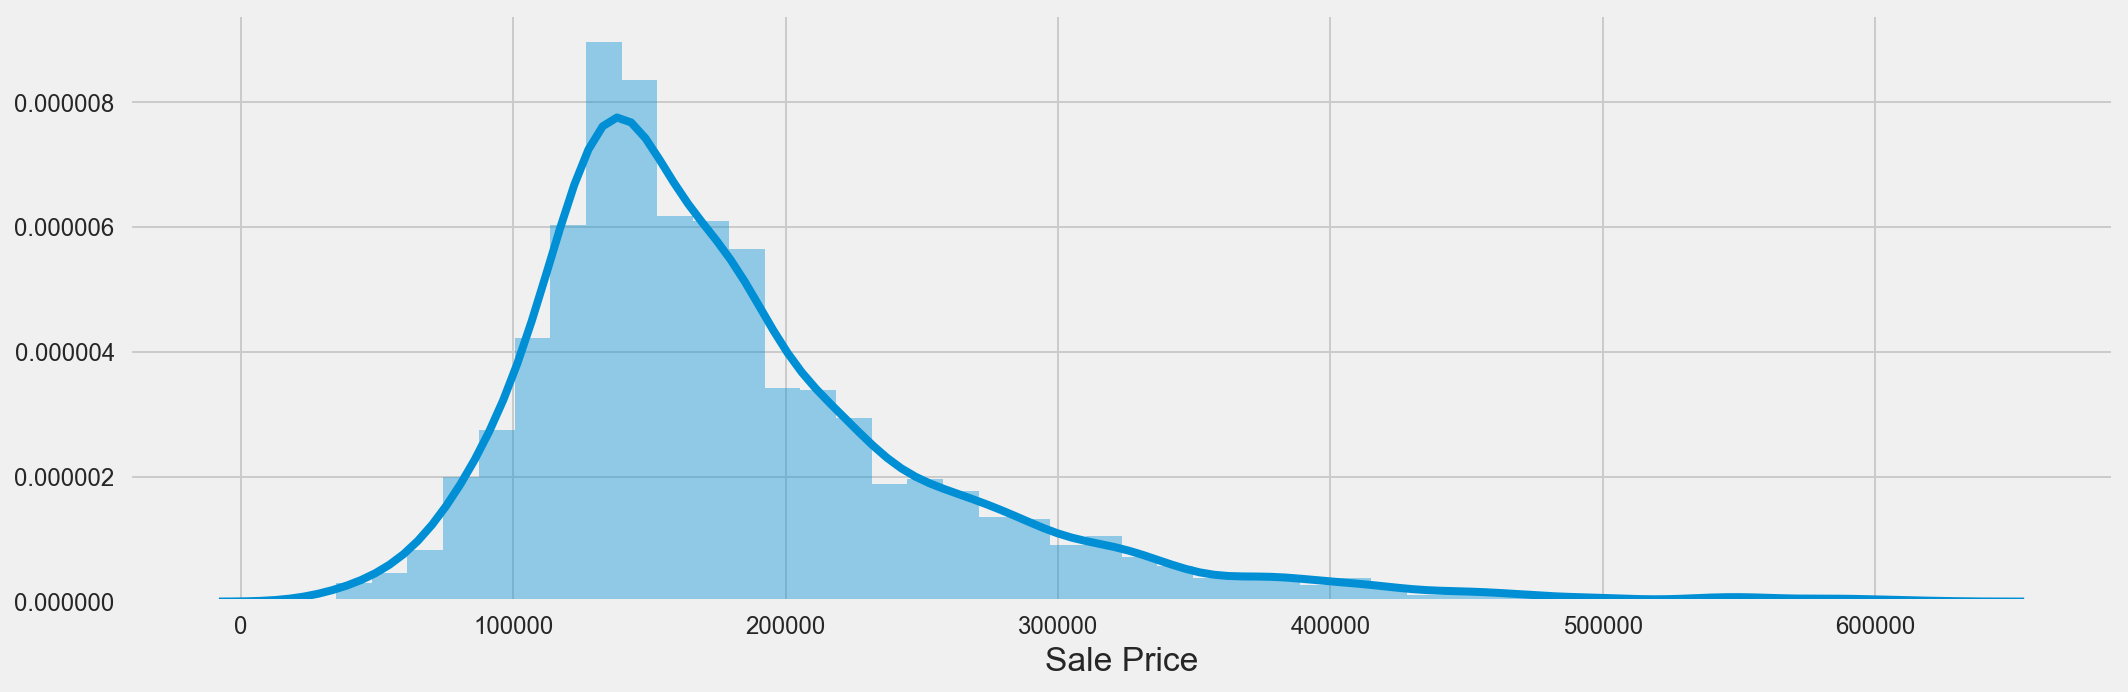

In [77]:
plt.figure(figsize=(15,5))
ax = plt.gca()
sns.distplot(ames_df['saleprice'])

plt.xlabel('Sale Price')
plt.tight_layout();

CPU times: user 448 ms, sys: 13.4 ms, total: 461 ms
Wall time: 459 ms


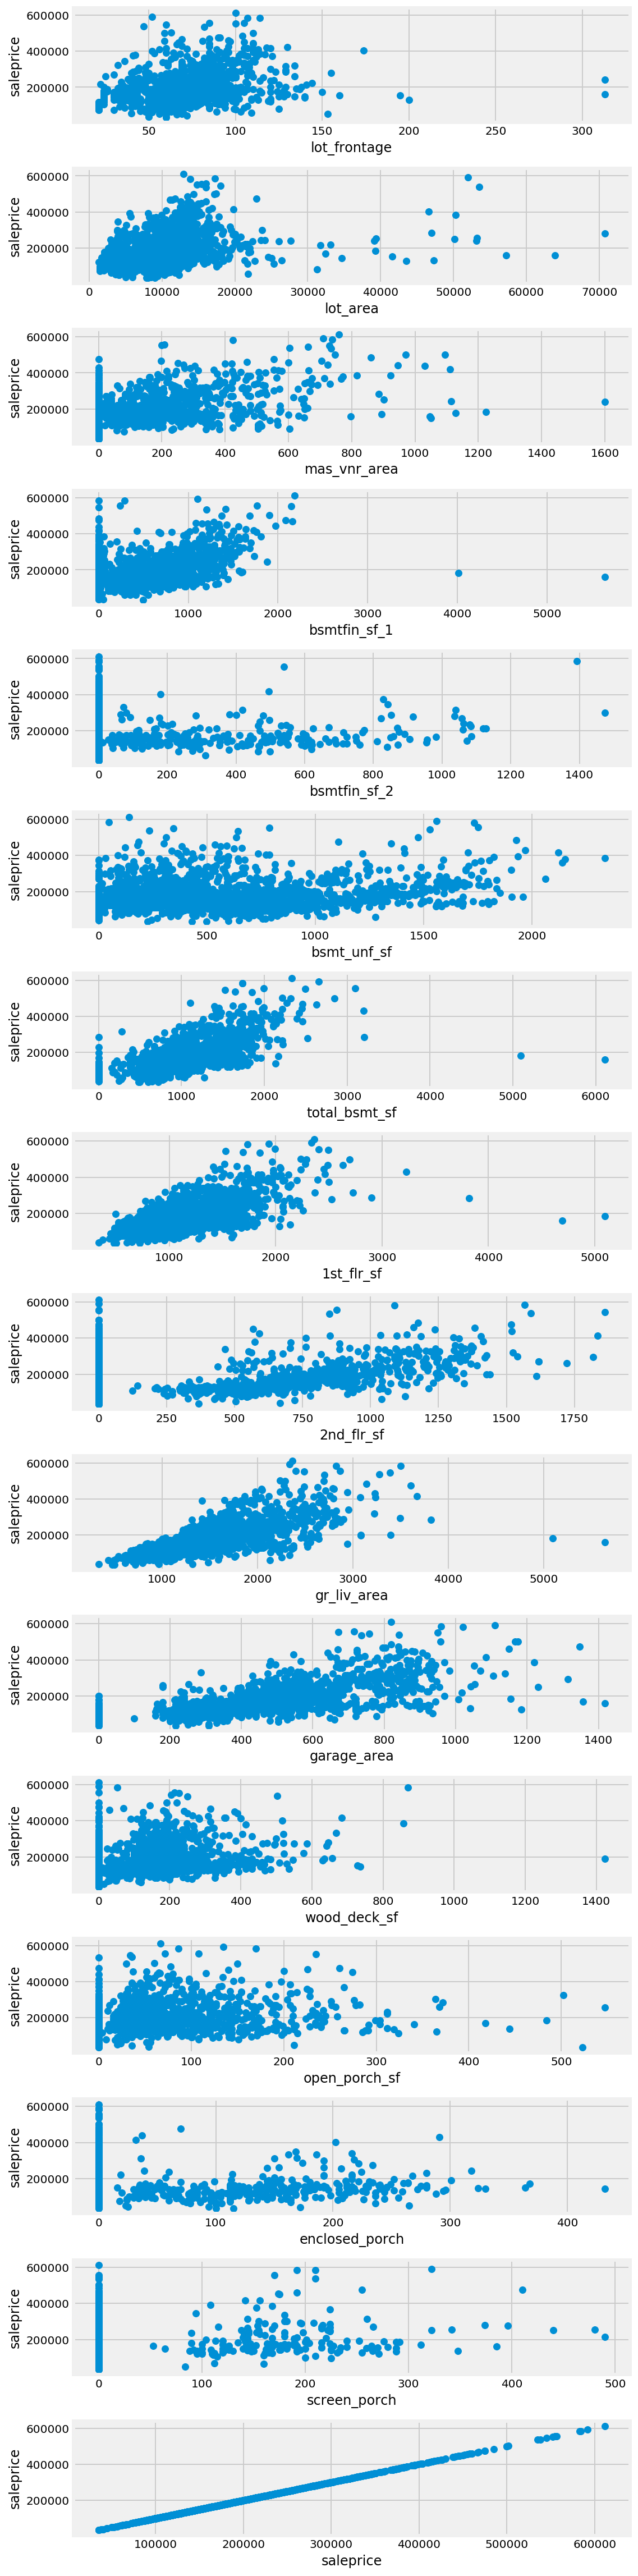

In [71]:
def scatter_func(df, ylabel):
    data = df.select_dtypes(exclude='object')
    fig, ax = plt.subplots(ncols = 1, nrows = data.shape[1], figsize = (8, data.shape[1]*2))
    i=0
    for col in data:
        ax[i].scatter(data[col], df[ylabel])
        ax[i].set_xlabel(str(col))
        ax[i].set_ylabel(ylabel)
        i+=1
    plt.tight_layout()


%time scatter_func(ames_df, 'saleprice')

### Step # 3: Initial interpretations of these Plots

In my opinion, when thinking about housing prices the first assumption I always make is that neighborhood and lot size are the most important factors to the price of a home. However, after looking at the plots above it seems that there are actually variables that are more highly correlated to the Sale Price.
- Below I've manually created a heatmap of some of those variables that I've noticed to have those higher correlations (along with Lot Size)
- Also, an additional box plot to show the Sale Price distribution by Neighborhood.

Overall, at this point it seems that the following have the highest correlations to Sale Price:
- 1st Flr Sf : First Floor square footage
- Garage Area : The size of the garage in square feet
- Gr Liv Area : The above grade (ground) living area square footage

And, by Neighborhood:
- StoneBr  : Stone Brook, has the most distribution in prices and one the highest priced homes
- NridgeHt : Northridge Heights, has the second largest distribution in prices and has the highest priced home
- IDOTRR   : Iowa DOT and Rail Road, has one of the smallest distributions in prices and has one of the lowest priced homes
- Brkside  : Brick Face, has another one of the lowest distributions in prices and has probably the lowest priced home in the dataset

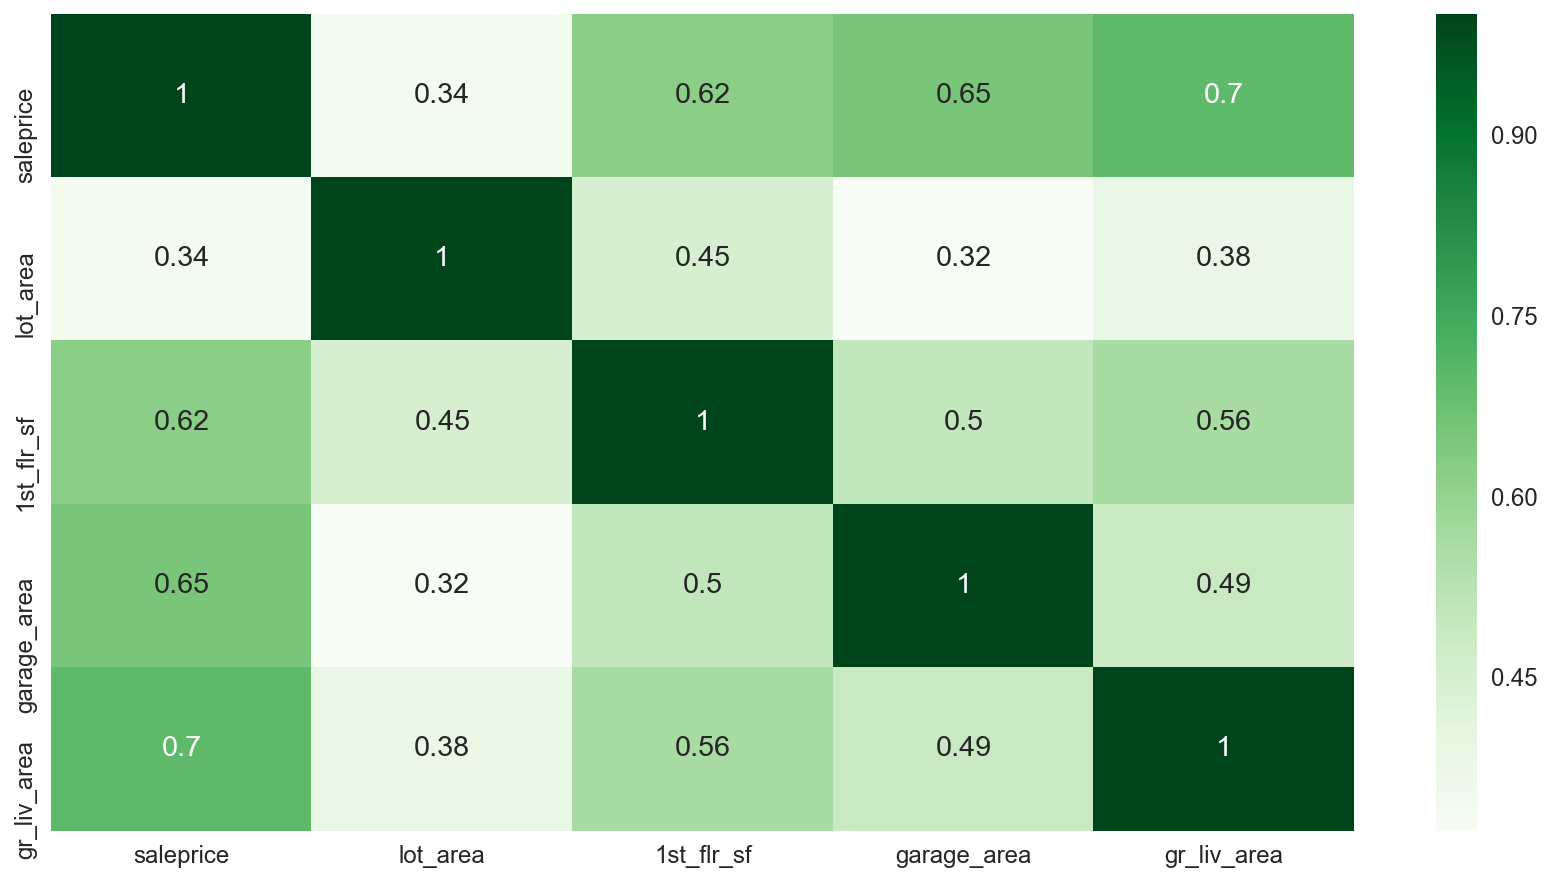

In [89]:
plt.figure(figsize=(13,7))
sns.set(font_scale=1.2, color_codes='green')
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=8)
sns.heatmap(ames_df[['saleprice', 'lot_area', '1st_flr_sf', 'garage_area', 'gr_liv_area']].corr(), 
            annot=True, cmap="Greens")

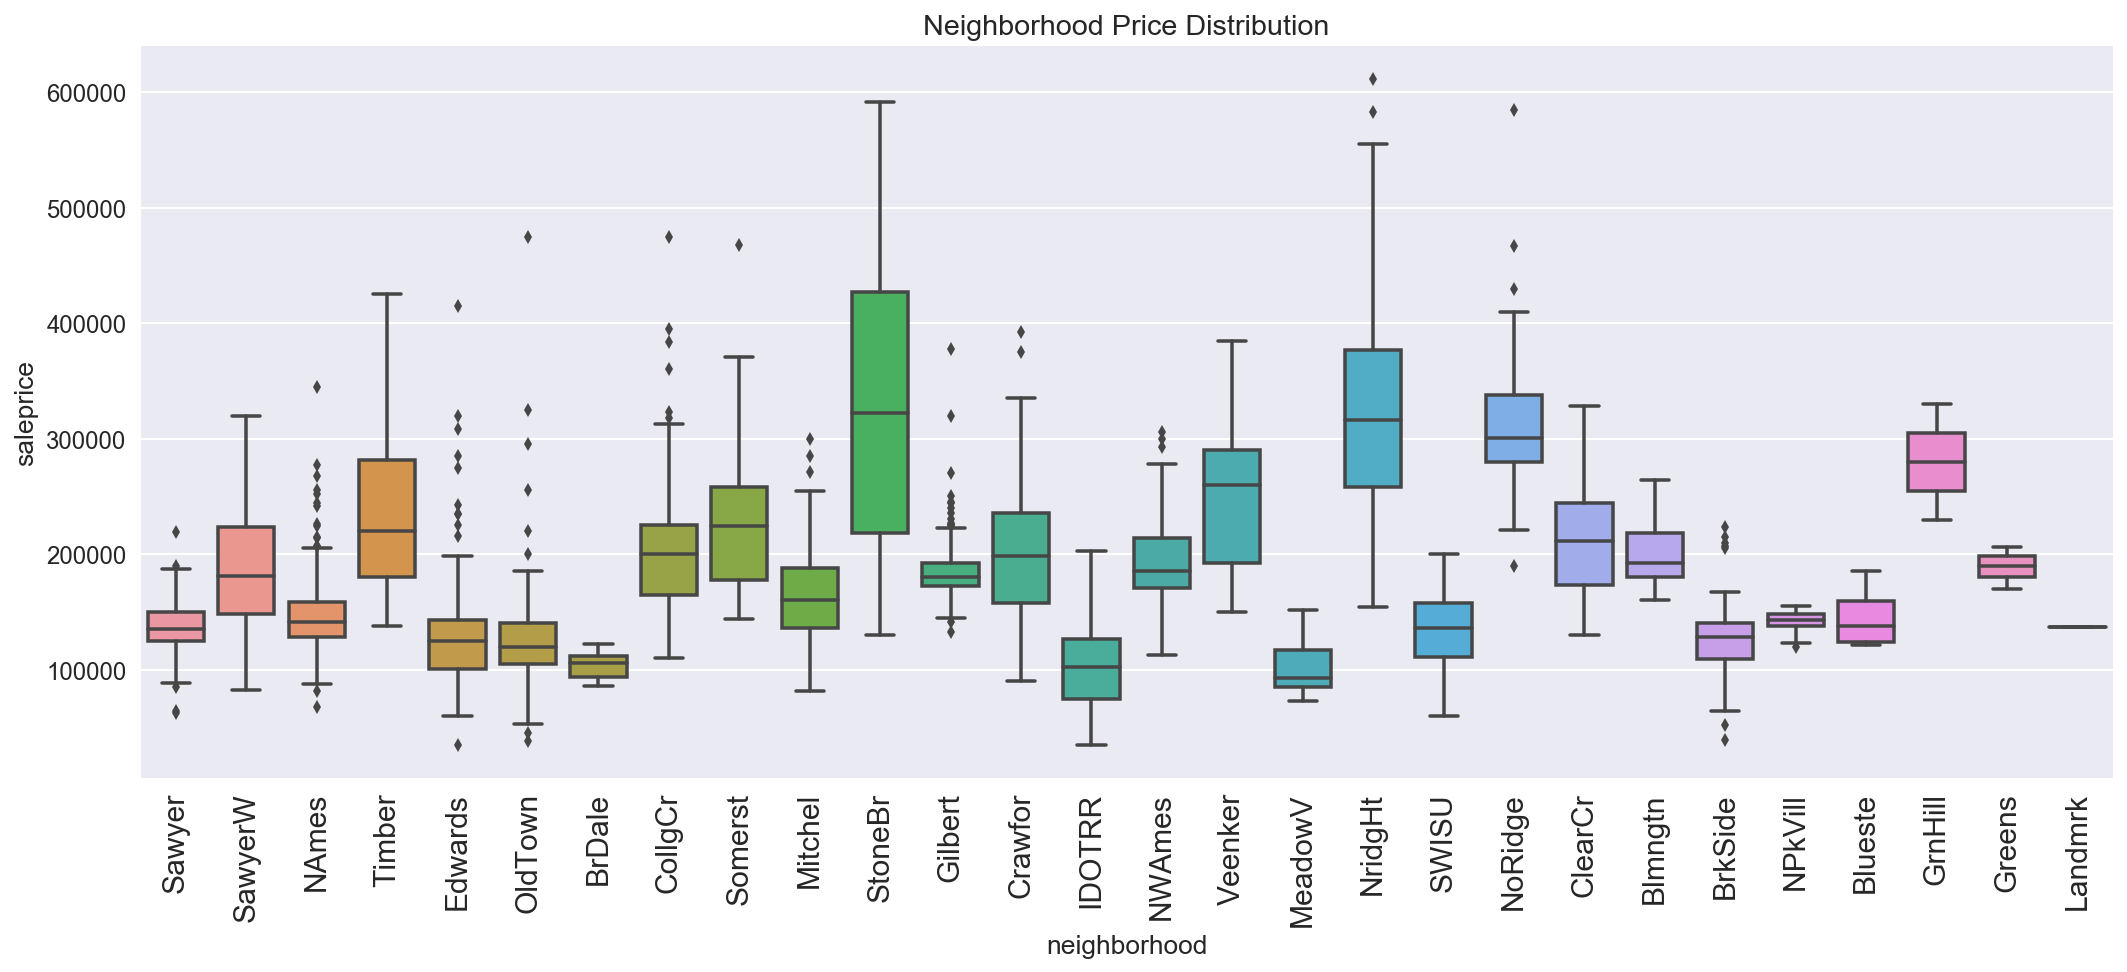

In [74]:
plt.figure(figsize=(15,7))
plt.title('Neighborhood Price Distribution')
locs, labels = plt.xticks(fontsize=15)
plt.setp(labels, rotation=90)
sns.boxplot('neighborhood', 'saleprice', data=ames_df)
plt.tight_layout();